### Support Vector Machines
* Used for classification (more commonly)
* Used for regression
* Also, for outlier detection

* Plot data in a n-dim space. Each data is represented as a vector.
* We then find a hyper-place that seperates two classes

### How to find the hyper-plane ? 
* Among possibility of multiple hyper-planes, find the one with best cast
* Maximize the distance between nearest data point of support vectors
* A feature to data when they are difficult to separete, and then create a plane to separate the data. This is also known as kernel trick

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import load_iris

In [2]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

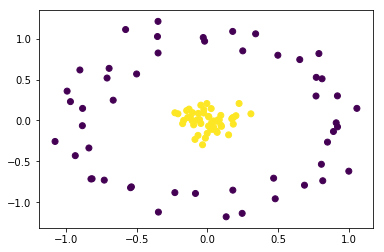

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)

In [5]:
from sklearn.svm import SVC

In [6]:
clf = SVC(kernel='linear')
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
clf.score(X,y)

0.67000000000000004

In [8]:
clf = SVC(kernel='rbf')
clf.fit(X,y)
clf.score(X,y)

1.0

In [9]:
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
y

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

### Prez face classification using PCA & SVM

In [12]:
from sklearn.datasets import fetch_lfw_people

In [13]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [14]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'],
      dtype='<U17')

In [15]:
faces.images.shape

(1348, 62, 47)

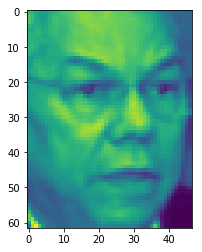

In [16]:
plt.imshow(faces.images[0])

In [17]:
faces.target[0]

1

In [21]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [22]:
pca = PCA(svd_solver='randomized', n_components=150,)

In [23]:
svc = SVC(kernel='rbf')

In [24]:
model = make_pipeline(pca,svc)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
trainX, testX, trainY, testY = train_test_split(faces.data, faces.target)

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

In [32]:
grid = GridSearchCV(model, param_grid)

In [33]:
grid.fit(trainX,trainY)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [34]:
grid.score(testX,testY)

0.39465875370919884

In [35]:
grid.best_params_

{'svc__C': 1, 'svc__gamma': 0.0001}